# Time Series ForeCasting

**Time series forecasting**is a techniaue used to predict future  values of a variable based on its historical data points, where the data points are ordered and equal spaced in time.In time series forecasting,the objective is to analyze patterns,trend,and dependencies within the data to make accurate predictions for furture time points.


The key idea behind time series forecasting is that the future values of a variable can be influenced by its past values and other factors such as seasonality, trends, and cyclical patterns. By understanding these patterns and relationships, we can develop models that capture the underlying dynamics of the time series and use them to forecast future values.

Time series forecasting is widely used in various domains, including finance, economics, sales and demand forecasting, weather prediction, stock market analysis, resource planning, and many others. It provides valuable insights for decision-making, helps in understanding the behavior of the time-dependent variable, and aids in planning and strategizing based on anticipated future values.

Different methods and models can be employed for time series forecasting, ranging from simple statistical techniques such as moving averages and exponential smoothing to more advanced methods like autoregressive integrated moving average (ARIMA), seasonal decomposition of time series (STL), and machine learning algorithms such as random forests, support vector machines, and neural networks.

The choice of the forecasting method depends on the characteristics of the time series data, the presence of seasonality and trends, the available historical data, and the specific requirements of the forecasting problem.

# Key Concepts to Learn

**10 concepts and techniques you should learn:**

1.**Time Series Analysis:** Gain a solid understanding of the basic principles and concepts of time series analysis. This includes stationarity, trend analysis, seasonality, autocorrelation, and decomposition.

2.**Forecasting Methods:** Learn a range of forecasting methods and models, including moving averages, exponential smoothing, ARIMA, SARIMA, seasonal decomposition of time series (STL), state space models, and machine learning-based approaches.

3.**Data Preparation:** Master techniques for handling time series data, such as handling missing values, handling outliers, and dealing with irregularly spaced data. Understand how to transform data if necessary, such as differencing to achieve stationarity.

4.**Model Selection and Evaluation:** Understand how to choose an appropriate forecasting model for a given time series problem. Learn about model evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), root mean squared error (RMSE), and others.

5.**Seasonality and Trends:** Explore techniques for detecting and handling seasonality and trends in time series data. Learn about methods such as seasonal decomposition, seasonal adjustment, and trend modeling.

6.**Advanced Techniques:** Familiarize yourself with more advanced forecasting techniques, such as state space models (e.g., Kalman filters), dynamic regression models, vector autoregression (VAR), neural networks (e.g., LSTM), and ensemble methods.

7.**Model Diagnostics:** Develop skills in diagnosing the quality of forecasting models by analyzing residuals, checking for model assumptions, and conducting statistical tests.

8.**Time Series Visualization:** Learn to visualize time series data effectively using plots such as line plots, scatter plots, autocorrelation plots, and seasonal subseries plots. Visualization aids in understanding patterns and identifying potential forecasting models.

9.**Forecasting Software and Libraries:** Get hands-on experience with popular time series forecasting software and libraries such as Python's statsmodels, scikit-learn, and TensorFlow, as well as R's forecast and caret packages.

10.**Practice and Real-World Projects:** Gain practical experience by working on real-world time series forecasting projects. This allows you to apply your knowledge, explore different datasets, and encounter diverse forecasting challenges.



# 1. Time Series Analysis

### Stationarity

**Stationarity** is a fundamental concept in time series analysis. A stationary time series is one whose statistical properties, such as mean and variance, remain constant over time. It implies that the series has a consistent behavior, and its patterns are predictable over different time periods.s:

**Stationary time series exhibit the following properties:**

1.**Constant mean:** The mean of the series remains the same throughout time.

2.**Constant variance:** The variance (or standard deviation) of the series remains constant over time.

3.**Constant autocovariance:** The relationship between observations at different time lags remains constant.

Stationarity is important because many time series analysis techniques and forecasting models assume stationarity or work best with stationary data.

When a time series is not stationary, it may exhibit trends, seasonality, or other systematic patterns that can affect the accuracy of forecasts.

To check for stationarity in the provided dataset, we can perform the following steps:


# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv ('Electric_Production .csv',parse_dates=['DATE'])
data.set_index('DATE', inplace=True)

In [5]:
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [7]:
data.dropna(inplace = True)

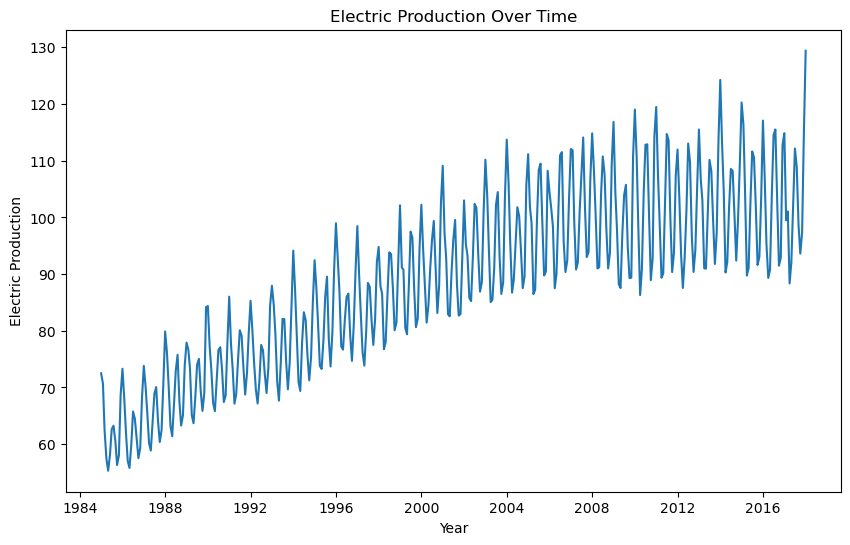

In [8]:
# visualize the time series

plt.figure(figsize=(10,6))
plt.plot(data.index,data['Value'])
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric Production Over Time')

plt.show()

In [9]:
# performe the Augmented dickey-Fuller test

result = adfuller(data['Value'])
print('ADF Statistic:',result[1])
print('p-value:',result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)

ADF Statistic: 0.1862146911658703
p-value: 0.1862146911658703
Critical Values:
1% : -3.4476305904172904
5% : -2.869155980820355
10% : -2.570827146203181


The ADF test helps determine if a time series is stationary or not. It provides the ADF statistic, p-value, and critical values for different significance levels.

After running the code, the ADF statistic, p-value, and critical values will be printed. If the p-value is less than a chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that the time series is stationary. Otherwise, if the p-value is greater than the significance level, we fail to reject the null hypothesis, suggesting that the time series is non-stationary.

# Trend Analysis

**Trend analysis** in time series forecasting refers to the process of identifying and understanding the long-term upward or downward movement in the data. It helps to uncover the underlying direction or pattern in the time series, which can be valuable for forecasting and decision-making.

**To perform trend analysis on a time series, we can use various techniques, including visual inspection, moving averages, and regression analysis.**

1.**Visual Inspection:** Plotting the time series data can often reveal the presence of a trend. A clear upward or downward movement over time suggests the presence of a trend component. Visual inspection allows you to observe the overall pattern and identify any deviations or changes in the series.

2.**Moving Averages:** Moving averages are widely used for trend analysis. They help smooth out short-term fluctuations in the data, making it easier to identify the underlying trend. Common types of moving averages include the simple moving average (SMA), weighted moving average (WMA), and exponential moving average (EMA).

**Here are the three common types of moving averages used for trend analysis:**

* **Simple Moving Average (SMA):** The Simple Moving Average calculates the average of a specified number of data points over a defined window. Each data point contributes equally to the average, and older observations are equally weighted as newer ones. The SMA provides a smoothed representation of the data by reducing random fluctuations.

* **Weighted Moving Average (WMA):** The Weighted Moving Average assigns different weights to the data points within the window. The weights can be linear or follow a specific pattern. The WMA gives more emphasis to recent observations, allowing it to respond more quickly to changes in the data compared to the SMA.

* **Exponential Moving Average (EMA):** The Exponential Moving Average is a type of weighted moving average that assigns exponentially decreasing weights to the data points. It places more weight on recent observations while gradually reducing the importance of older observations. The EMA is more responsive to recent changes in the data and is often used in technical analysis.

3.**Regression Analysis:** Regression analysis can be applied to estimate and visualize the trend component of a time series. It involves fitting a regression model to the data, where time is considered as an independent variable and the variable of interest is the dependent variable. The trend component can then be extracted from the regression model.


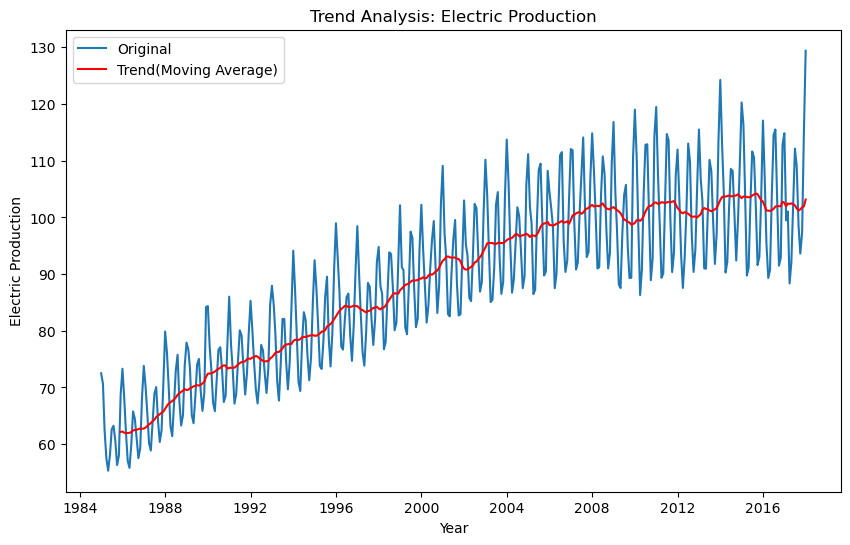

In [10]:
# Calculate the rolling mean (simple moving average) with a window size of 12 months.

rolling_mean = data['Value'].rolling(window=12).mean()

# visualize the original time series and the trend component

plt.figure(figsize=(10,6))
plt.plot(data.index,data['Value'],label='Original')
plt.plot(data.index,rolling_mean,color='red',label='Trend(Moving Average)')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Trend Analysis: Electric Production')
plt.legend()
plt.show()

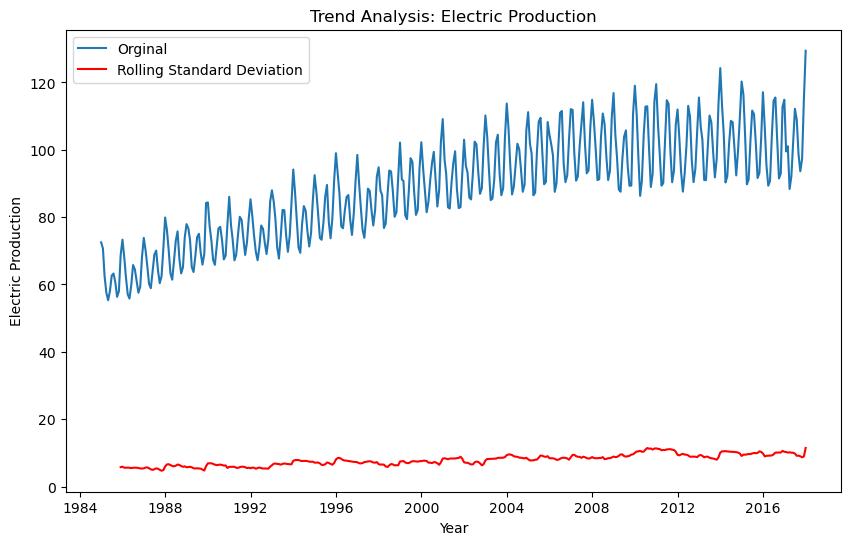

In [11]:
# calculate the rolling SD with a window size of 12 months
rolstd =  data.rolling(window=12).std()

# visualise the original time series and the trend component

plt.figure(figsize=(10,6))
plt.plot(data.index,data['Value'],label='Orginal')
plt.plot(data.index,rolstd,color='red',label='Rolling Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Trend Analysis: Electric Production')
plt.legend()
plt.show()
           

The moving average is calculated using the rolling()function with a window size of 12 month. The rolling mean represents the trend component of the series. The original time series and the trend component are then plotted for visual analysis.</div>

# Seasonality

**Seasonality**in time series refers to the reppetitive and predictable that occur at fixed intervals within the data.It represent variations in the data are related to specific calendar period,such as days,week,month,quarters or year.Identifying seasonality is crucial for understanding the cyclical patteren and amking accurate forecasts.

**To detect and analyze seasonality in atime series,several technique can be employed:**

1.**Seasonal Subseries Plot**:This plotb helps visualize the seasonal patterns by dividing the data into individual seasons or calendar periods. It display subsets of the data corresponding to each seasons,allowing you to observe any recurring patterns or fluctuations.

2.**Seasonal Decomposition**:Seasonal decomposition of the time series(STL) is a method that seprates a time series inro its individual components:trend,seasonality,and residual. This technique decomposes the series to better understand and analyze the seasonal component independently.

In [13]:
#create a new column for the month
data['Month']=data.index.month

#Calculate the average value for each month across all years
monthly_avg = data.groupby('Month')['Value'].mean()

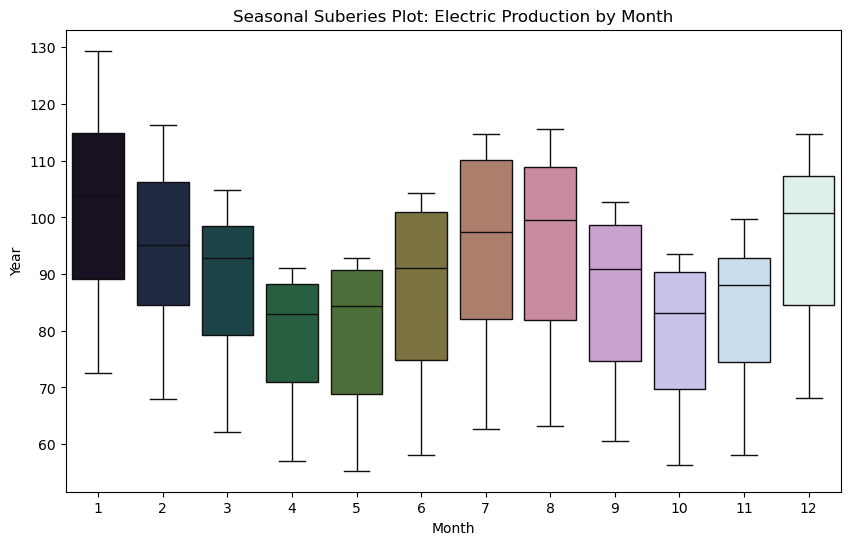

In [18]:
#create a seaborn subseries plot
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Month'],y=data['Value'],palette='cubehelix')
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Seasonal Suberies Plot: Electric Production by Month')
plt.show()

# Autocorrelation

The **Autocorrelation Function(ACF)** is a mathemethical tool to measure the correlation tool used to measure the correlation betweenm a time series and its lagged values.It quantifies the relationship between an observation at a given time points and observation at previous time points.

The **ACF** provides information about the strength and direction of linear dependence between the values of time series at different lags.It helps identify nany pattern or dependencies in the data.The **ACF** values range from-1 to 1,where:

* ACF value of 1 indicates a perfect positive correlation between the current observation and the lagged observation.

* ACF value of -1 indicates a perfect negative correlation between the current observation and the lagged observation.

* ACF value of 0 indicates no coreelation between the current observation and the lagged observation

By plotting the ACF values aginst different lags,we can analyze the autocorrelation structure of the time series and identify any significant pattern or dependencies.

The **ACF** plot visually represents the ACF values for different lags.It helps to determine the presence of seasonality,trend or other autocorrelation pattern in the data.By analyzing the ACF plot,we can gain insights into the time series behaviour and select appropriate models for forecasting or future analysis.

So,the **Autocorrelation Function(ACF)** is a tool to meaure and visualize the correlation between a time series and its lagged values, providing valuable information about the temporal dependencies within the data.

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1000x600 with 0 Axes>

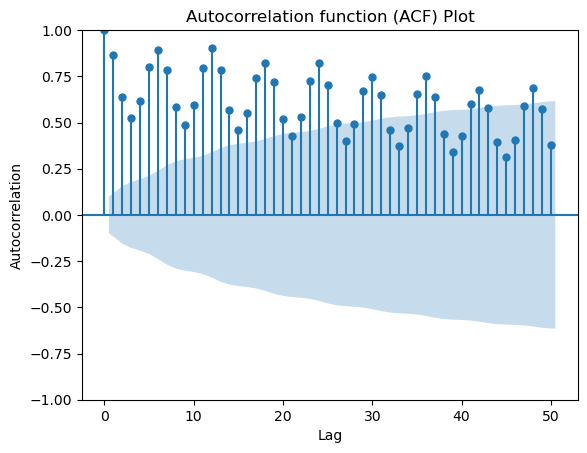

In [21]:
#Generate the ACF plot
plt.figure(figsize=(10,6))
plot_acf(data['Value'],lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation function (ACF) Plot')
plt.show()

**PACF** stand for **Partial Autocorrelation Function** it is a statistical tool used in time series analysis to identify the direct relationship between an observation and its lagged values,after accounting for the efforts of the intermediate lags.

The **PACF** measure the correlartion between a time series and its lagged values,while controlling for the effects of the intervening lags.It hepls determine the number of autoregressive terms(AR terms) in an Autoregressive integrated Mloving Average(ARIMA) models.

In the context of time series forecasting,the **PACF** plot is used to identify the significant lag values that contribute  to the predication of the time series.It helps determine the orders of the autorefggresive(AR) component of the ARIMA model.

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf

<Figure size 1000x600 with 0 Axes>

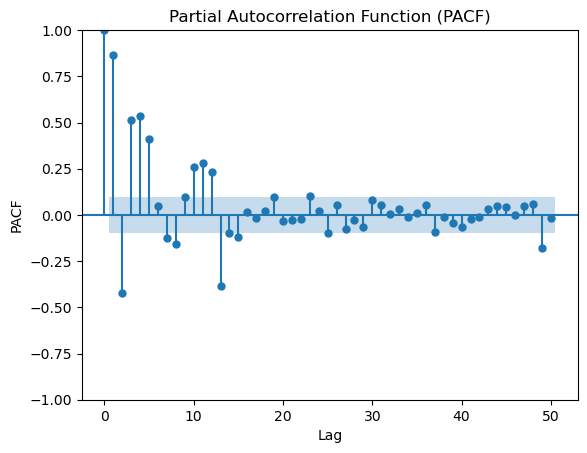

In [23]:
# Calculate the PACF
plt.figure(figsize=(10,6))
plot_pacf(data['Value'],lags=50)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Decomposition

**Decomposition** is a technique used in time series analysis to break down a time series into its individual components, namely trend, seasonality, and residual (or error). It allows us to understand the underlying patterns and characteristics of the time series, making it easier to analyze and forecast.

**There are different types of decompositions commonly used in time series analysis:**

1.**Additive Decomposition:** In additive decomposition, the time series is expressed as the sum of its individual components: trend, seasonality, and residual. It assumes that the magnitude of the seasonal fluctuations remains constant throughout the time series.

2.**Multiplicative Decomposition:** In multiplicative decomposition, the time series is expressed as the product of its individual components: trend, seasonality, and residual. It assumes that the seasonal fluctuations vary proportionally with the level of the time series.

**Decomposition can be performed using various methods, including:**

1.**Classical Decomposition:** The classical decomposition method separates the time series into its trend, seasonality, and residual components using techniques such as moving averages, differencing, and mathematical modeling.

2.**Seasonal and Trend decomposition using LOESS (STL):** STL is a robust method that decomposes a time series into its trend, seasonality, and residual components using locally weighted regression. It handles irregularities and outliers in the data effectively.

3.**Seasonal decomposition of time series using moving averages (SMA):** SMA decomposition applies moving averages to identify the trend and seasonality components in the time series. It can be used when the time series exhibits clear seasonality patterns.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

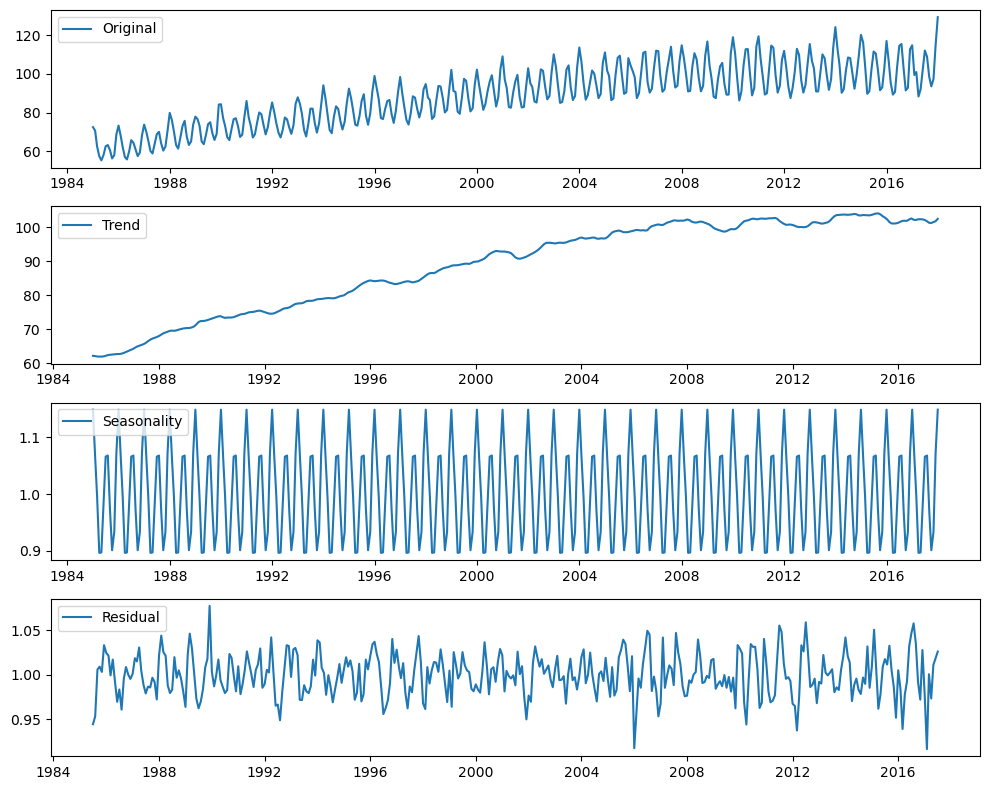

In [30]:
# Perform seasonal decompostion

decomposition  = seasonal_decompose(data['Value'],model='multiplicative')

# Plot the decomposition components

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Time Series Forecasting

## Moving Averages

Moving averages are a simple and widely used method for trend analysis. They smooth out short-term fluctuations in the data, making it easier to identify the underlying trend. The most common type of moving average is the Simple Moving Average (SMA), which calculates the average of a fixed window of past values. It is useful for detecting trends over a specific period of time.

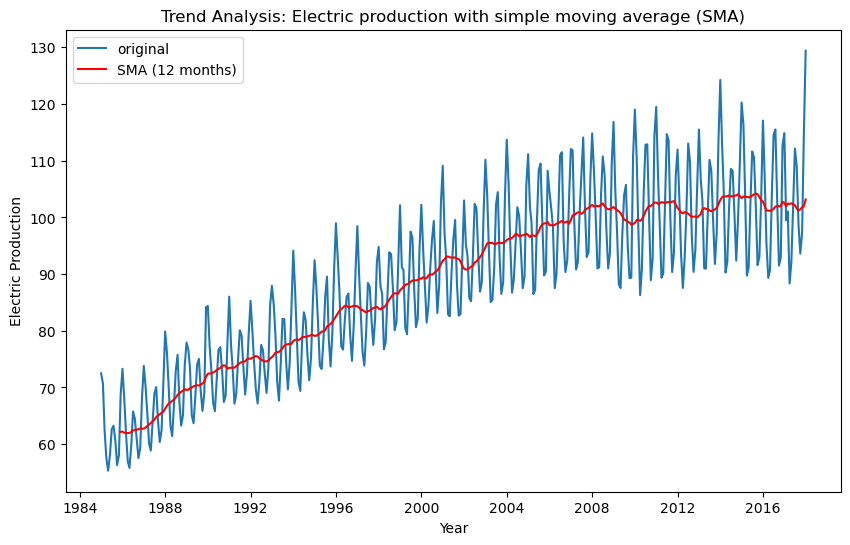

In [32]:
# Calculate he simple Moving average with a window size of 12 months
sma = data['Value'].rolling(window=12).mean()

#Visualize the original time series and the SMA

plt.figure(figsize=(10,6))
plt.plot(data.index,data['Value'],label='original')
plt.plot(data.index,sma,color='red',label='SMA (12 months)')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Trend Analysis: Electric production with simple moving average (SMA)')
plt.legend()
plt.show()

# Exponential Soothing

Exponential Smoothing is a time series forecasting method that assigns exponentially decreasing weights to past observations. It is based on the principle that recent observations are more relevant for forecasting than older ones. Exponential smoothing methods, such as the Simple Exponential Smoothing (SES), give more weight to recent data points and are suitable for data with no significant trend or seasonality.

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

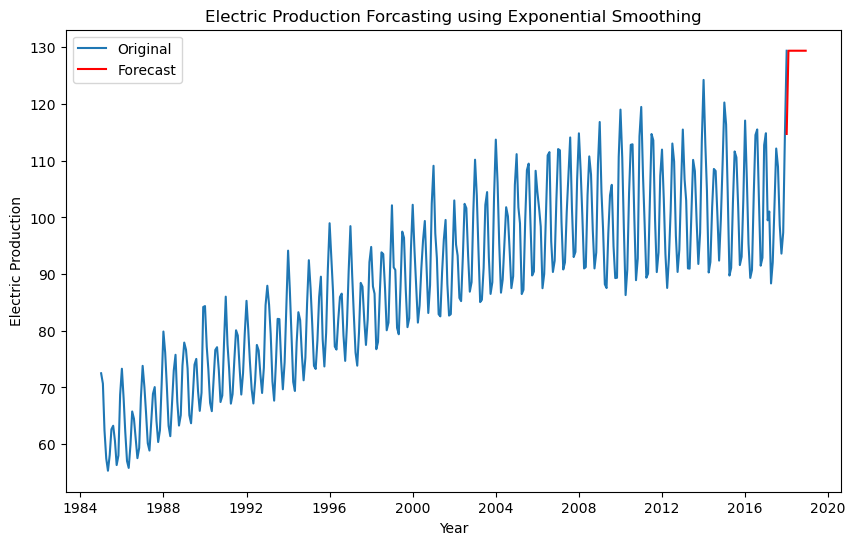

In [40]:
# Apply expoential smoothing

model = SimpleExpSmoothing(data['Value'])

fitted_model = model.fit()
forecast = fitted_model.predict(start=data.index[-1],end=data.index[-1] + pd.DateOffset(month=12))

# Visualize the original time series and the firecast

plt.figure(figsize=(10,6))
plt.plot(data['Value'],label='Original')
plt.plot(forecast,color='red',label ='Forecast')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric Production Forcasting using Exponential Smoothing')
plt.legend()
plt.show()


# ARIMA - Autoregressive Integrated Moving Average

ARIMA is a popular forecasting model that combines autoregressive (AR), differencing (I), and moving average (MA) components. It is effective for capturing linear trends and seasonality in the data. ARIMA models require the data to be stationary, which means that the mean and variance of the series remain constant over time. If the data is not stationary, differencing can be applied to make it stationary before fitting the model.

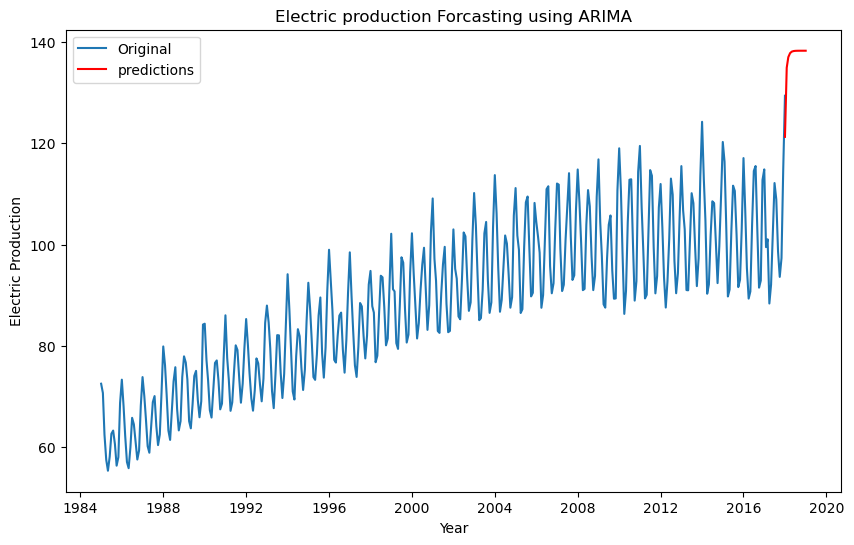

In [45]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model= ARIMA(data['Value'],order=(1, 1, 0))
fitted_model = model.fit()

#Make predications

predictions = fitted_model.predict(start=data.index[-1], end=data.index[-1] + pd.DateOffset(months=12))

# visualize the original time series and predications
plt.figure(figsize=(10,6))
plt.plot(data['Value'],label='Original')
plt.plot(predictions,color='red',label='predictions')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric production Forcasting using ARIMA')
plt.legend()
plt.show()

# SARIMA - Seasonal ARIMA

SARIMA is an extension of the ARIMA model that incorporates seasonality in the data. It includes additional seasonal components to capture recurring patterns at fixed intervals (e.g., monthly, quarterly, yearly). SARIMA models are useful for time series with significant seasonal variations. The seasonal components are specified by the seasonal order parameter, which represents the seasonal AR, differencing, and MA terms.

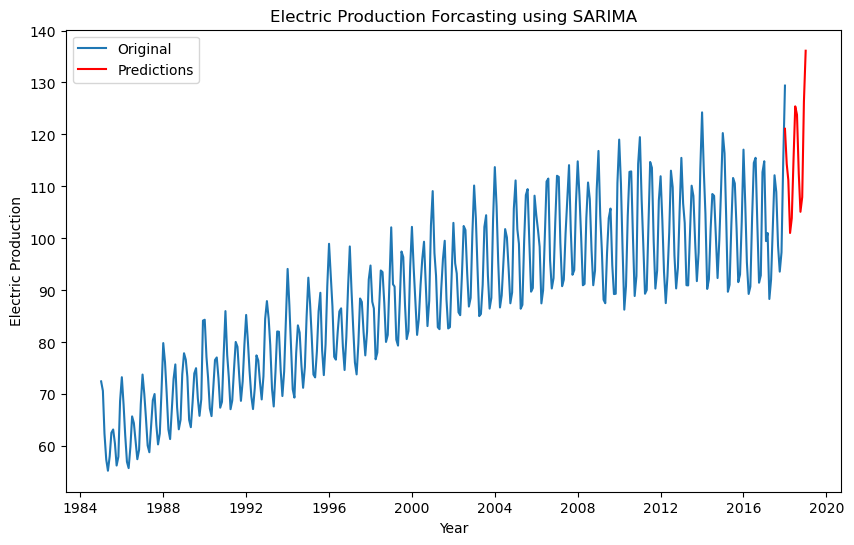

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model

model = SARIMAX(data['Value'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
fitted_model = model.fit()

#Make predictions

predictions = fitted_model.predict(start=data.index[-1],end=data.index[-1] + pd.DateOffset(months = 12))

#Visualize the original time series and the predictions

plt.figure(figsize=(10,6))
plt.plot(data['Value'],label='Original')
plt.plot(predictions, color='red',label='Predictions')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric Production Forcasting using SARIMA')
plt.legend()
plt.show()

# Seasonal Decomposition of Time Series (STL)

STL is a decomposition technique that separates a time series into its three main components: trend, seasonality, and residual. It is helpful for understanding the underlying patterns and characteristics of the data. STL decomposes the time series using locally weighted regression and handles irregularities and outliers effectively. It provides a clearer view of the individual components and their contributions to the overall behavior of the time series.

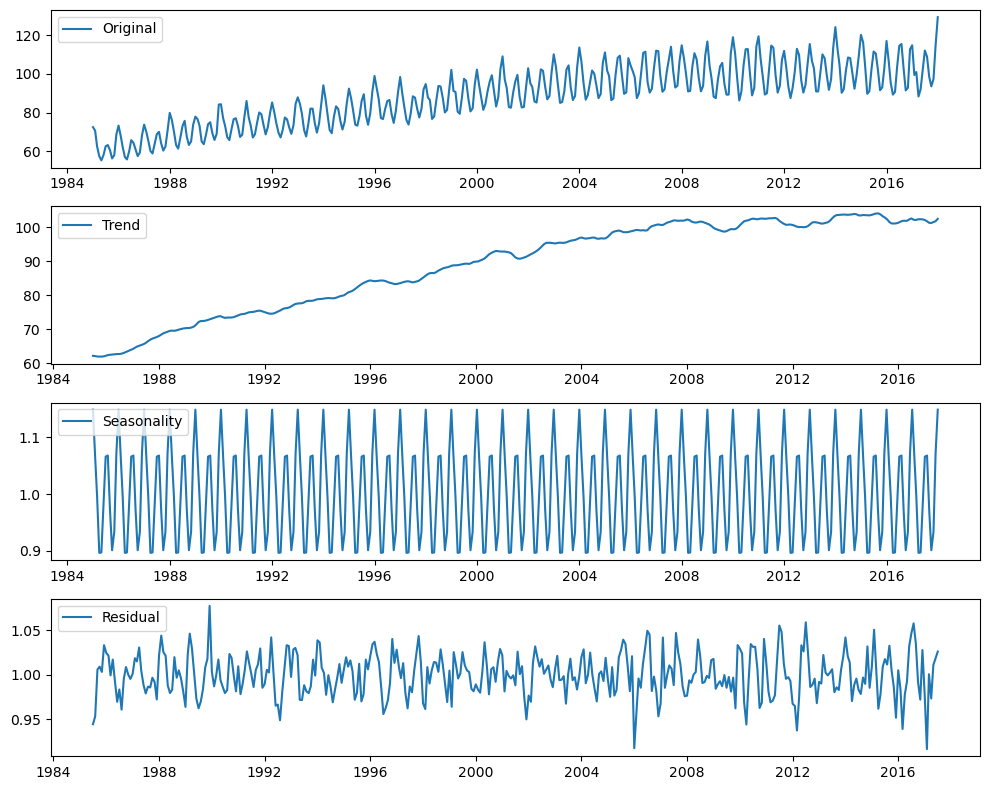

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

# perform seasonal decompostion

decomposition = seasonal_decompose(data['Value'],model='multiplicative')

# plot the decomposition components
plt.figure(figsize=(10,8))
plt.subplot(411)
plt.plot(data['Value'],label ='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend,label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid,label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

These forecasting methods/models offer different approaches for analyzing and predicting time series data. The choice of model depends on the characteristics of the data, the presence of trends or seasonality, and the specific requirements of the forecasting task. It's essential to assess the performance of each model and select the one that best fits the data and yields accurate predictions.